In [1]:
%reload_ext nb_black
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import warnings
from scipy.stats.stats import ttest_ind

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

postgres_user = "dsbc_student"
postgres_pw = "7*.8G9QH21"
postgres_host = "142.93.121.174"
postgres_port = "5432"
postgres_db = "lifeexpectancy"
table_name = "lifeexpectancy"

engine = create_engine(
    "postgresql://{}:{}@{}:{}/{}".format(
        postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db
    )
)

life_df = pd.read_sql_query("select * from lifeexpectancy", con=engine)
engine.dispose()

<IPython.core.display.Javascript object>

In [2]:
life_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

<IPython.core.display.Javascript object>

In [3]:
life_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

<IPython.core.display.Javascript object>

In [4]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
life_df

Country  Year      Status  \
0                                           Afghanistan  2015  Developing   
1                                           Afghanistan  2014  Developing   
2                                           Afghanistan  2013  Developing   
3                                           Afghanistan  2012  Developing   
4                                           Afghanistan  2011  Developing   
5                                           Afghanistan  2010  Developing   
6                                           Afghanistan  2009  Developing   
7                                           Afghanistan  2008  Developing   
8                                           Afghanistan  2007  Developing   
9                                           Afghanistan  2006  Developing   
10                                          Afghanistan  2005  Developing   
11                                          Afghanistan  2004  Developing   
12                                          Afghanistan  2003  Developing   
13                                          Afghanistan  2002  Developing   
14                                          Afghanistan  2001  Developing   
15                                          Afghanistan  2000  Developing   
16                                              Albania  2015  Developing   
17                                              Albania  2014  Developing   
18                                              Albania  2013  Developing   
19                                              Albania  2012  Developing   
20                                              Albania  2011  Developing   
21                                              Albania  2010  Developing   
22                                              Albania  2009  Developing   
23                                              Albania  2008  Developing   
24                                              Albania  2007  Developing   
25                                              Albania  2006  Developing   
26                                              Albania  2005  Developing   
27                                              Albania  2004  Developing   
28                                              Albania  2003  Developing   
29                                              Albania  2002  Developing   
30                                              Albania  2001  Developing   
31                                              Albania  2000  Developing   
32                                              Algeria  2015  Developing   
33                                              Algeria  2014  Developing   
34                                              Algeria  2013  Developing   
35                                              Algeria  2012  Developing   
36                                              Algeria  2011  Developing   
37                                        Côte d'Ivoire  2001  Developing   
38                                              Algeria  2010  Developing   
39                                              Algeria  2009  Developing   
40                                              Algeria  2008  Developing   
41                                              Algeria  2007  Developing   
42                                              Algeria  2006  Developing   
43                                              Algeria  2005  Developing   
44                                              Algeria  2004  Developing   
45                                              Algeria  2003  Developing   
46                                              Algeria  2002  Developing   
47                                              Algeria  2001  Developing   
48                                              Algeria  2000  Developing   
49                                               Angola  2015  Developing   
50                                               Angola  2014  Developing   
51                                          

<IPython.core.display.Javascript object>

In [5]:
# We see there are missing values in Life expectancy, Adult Mortality, Alcohol, Hepatitis B, BMI, Polio, Total expenditure,
# Diphtheria, GDP, Population, thinness 1-19 years, thinness 5-9 years, Income composition of resources, and Schooling.
# However, for the columns Life expectancy, Adult Mortality, Polio, and Diphtheria less than 1% is missing
life_df.isnull().mean() * 100

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

<IPython.core.display.Javascript object>

In [6]:
# The amount of missing values for life expectancy is miniscule. I believe disregarding the rows with missing
# life expectancy values will not cause any significant loss in the data.
crosstab = pd.crosstab(life_df["Life expectancy "].isnull(), life_df["Country"])
crosstab

Country           Afghanistan  Albania  Algeria  Angola  Antigua and Barbuda  \
Life expectancy                                                                
False                      16       16       16      16                   16   
True                        0        0        0       0                    0   

Country           Argentina  Armenia  Australia  Austria  Azerbaijan  Bahamas  \
Life expectancy                                                                 
False                    16       16         16       16          16       16   
True                      0        0          0        0           0        0   

Country           Bahrain  Bangladesh  Barbados  Belarus  Belgium  Belize  \
Life expectancy                                                             
False                  16          16        16       16       16      16   
True                    0           0         0        0        0       0   

Country           Benin  Bhutan  Bolivia (Plurinational State of)  \
Life expectancy                                                     
False                16      16                                16   
True                  0       0                                 0   

Country           Bosnia and Herzegovina  Botswana  Brazil  Brunei Darussalam  \
Life expectancy                                                                 
False                                 16        16      16                 16   
True                                   0         0       0                  0   

Country           Bulgaria  Burkina Faso  Burundi  Cabo Verde  Cambodia  \
Life expectancy                                                           
False                   16            16       16          16        16   
True                     0             0        0           0         0   

Country           Cameroon  Canada  Central African Republic  Chad  Chile  \
Life expectancy                                                             
False                   16      16                        16    16     16   
True                     0       0                         0     0      0   

Country           China  Colombia  Comoros  Congo  Cook Islands  Costa Rica  \
Life expectancy                                                               
False                16        16       16     16             0          16   
True                  0         0        0      0             1           0   

Country           Croatia  Cuba  Cyprus  Czechia  Côte d'Ivoire  \
Life expectancy                                                   
False                  16    16      16       16             16   
True                    0     0       0        0              0   

Country           Democratic People's Republic of Korea  \
Life expectancy                                           
False                                                16   
True                                                  0   

Country           Democratic Republic of the Congo  Denmark  Djibouti  \
Life expectancy                                                         
False                                           16       16        16   
True                                             0        0         0   

Country           Dominica  Dominican Republic  Ecuador  Egypt  El Salvador  \
Life expectancy                                                               
False                    0                  16       16     16           16   
True                     1                   0        0      0            0   

Country           Equatorial Guinea  Eritrea  Estonia  Ethiopia  Fiji  \
Life expectancy                                                         
False                            16       16       16        16    16   
True                              0        0        0         0     0   

Country           Finland  France  Gabon  Gambia  Georgia  Germany  Ghana  \
Life expectancy               

<IPython.core.display.Javascript object>

In [7]:
# The data is similar to the cross tab above and I will therefore disregard the rows with missing adult mortality values.
crosstab = pd.crosstab(life_df["Adult Mortality"].isnull(), life_df["Country"])
crosstab

Country          Afghanistan  Albania  Algeria  Angola  Antigua and Barbuda  \
Adult Mortality                                                               
False                     16       16       16      16                   16   
True                       0        0        0       0                    0   

Country          Argentina  Armenia  Australia  Austria  Azerbaijan  Bahamas  \
Adult Mortality                                                                
False                   16       16         16       16          16       16   
True                     0        0          0        0           0        0   

Country          Bahrain  Bangladesh  Barbados  Belarus  Belgium  Belize  \
Adult Mortality                                                            
False                 16          16        16       16       16      16   
True                   0           0         0        0        0       0   

Country          Benin  Bhutan  Bolivia (Plurinational State of)  \
Adult Mortality                                                    
False               16      16                                16   
True                 0       0                                 0   

Country          Bosnia and Herzegovina  Botswana  Brazil  Brunei Darussalam  \
Adult Mortality                                                                
False                                16        16      16                 16   
True                                  0         0       0                  0   

Country          Bulgaria  Burkina Faso  Burundi  Cabo Verde  Cambodia  \
Adult Mortality                                                          
False                  16            16       16          16        16   
True                    0             0        0           0         0   

Country          Cameroon  Canada  Central African Republic  Chad  Chile  \
Adult Mortality                                                            
False                  16      16                        16    16     16   
True                    0       0                         0     0      0   

Country          China  Colombia  Comoros  Congo  Cook Islands  Costa Rica  \
Adult Mortality                                                              
False               16        16       16     16             0          16   
True                 0         0        0      0             1           0   

Country          Croatia  Cuba  Cyprus  Czechia  Côte d'Ivoire  \
Adult Mortality                                                  
False                 16    16      16       16             16   
True                   0     0       0        0              0   

Country          Democratic People's Republic of Korea  \
Adult Mortality                                          
False                                               16   
True                                                 0   

Country          Democratic Republic of the Congo  Denmark  Djibouti  \
Adult Mortality                                                        
False                                          16       16        16   
True                                            0        0         0   

Country          Dominica  Dominican Republic  Ecuador  Egypt  El Salvador  \
Adult Mortality                                                              
False                   0                  16       16     16           16   
True                    1                   0        0      0            0   

Country          Equatorial Guinea  Eritrea  Estonia  Ethiopia  Fiji  Finland  \
Adult Mortality                                                                 
False                           16       16       16        16    16       16   
True                             0        0        0         0     0        0   

Country          France  Gabon  Gambia  Georgia  Germany  Ghana  Greece  \
Adult Mortality                                 

<IPython.core.display.Javascript object>

In [8]:
# Due to Alcohol having a more significant amount of missing values I chose to not disregard the rows.
# Additionally, since the data for alcohol content is not time series data I chose to fill the missing values with interpolation
crosstab = pd.crosstab(life_df["Alcohol"].isnull(), life_df["Country"])
crosstab

Country  Afghanistan  Albania  Algeria  Angola  Antigua and Barbuda  \
Alcohol                                                               
False             16       16       15      15                   15   
True               0        0        1       1                    1   

Country  Argentina  Armenia  Australia  Austria  Azerbaijan  Bahamas  Bahrain  \
Alcohol                                                                         
False           15       15         15       15          15       15       15   
True             1        1          1        1           1        1        1   

Country  Bangladesh  Barbados  Belarus  Belgium  Belize  Benin  Bhutan  \
Alcohol                                                                  
False            15        15       15       15      15     15      15   
True              1         1        1        1       1      1       1   

Country  Bolivia (Plurinational State of)  Bosnia and Herzegovina  Botswana  \
Alcohol                                                                       
False                                  15                      15        15   
True                                    1                       1         1   

Country  Brazil  Brunei Darussalam  Bulgaria  Burkina Faso  Burundi  \
Alcohol                                                               
False        15                 15        15            15       15   
True          1                  1         1             1        1   

Country  Cabo Verde  Cambodia  Cameroon  Canada  Central African Republic  \
Alcohol                                                                     
False            15        15        15      15                        15   
True              1         1         1       1                         1   

Country  Chad  Chile  China  Colombia  Comoros  Congo  Cook Islands  \
Alcohol                                                               
False      15     15     15        15       15     15             1   
True        1      1      1         1        1      1             0   

Country  Costa Rica  Croatia  Cuba  Cyprus  Czechia  Côte d'Ivoire  \
Alcohol                                                              
False            15       15    15      15       15             15   
True              1        1     1       1        1              1   

Country  Democratic People's Republic of Korea  \
Alcohol                                          
False                                       15   
True                                         1   

Country  Democratic Republic of the Congo  Denmark  Djibouti  Dominica  \
Alcohol                                                                  
False                                  15       15        15         1   
True                                    1        1         1         0   

Country  Dominican Republic  Ecuador  Egypt  El Salvador  Equatorial Guinea  \
Alcohol                                                                       
False                    15       15     15           15                 15   
True                      1        1      1            1                  1   

Country  Eritrea  Estonia  Ethiopia  Fiji  Finland  France  Gabon  Gambia  \
Alcohol                                                                     
False         15       15        15    15       15      15     15      15   
True           1        1         1     1        1       1      1       1   

Country  Georgia  Germany  Ghana  Greece  Grenada  Guatemala  Guinea  \
Alcohol                                                                
False         15       15     15      15       15         15      15   
True           1        1      1       1        1          1       1   

Country  Guinea-Bissau  Guyana  Haiti  Honduras  Hungary  Iceland  India  \
Alcohol                                                                    
False               15      15     15        15    

<IPython.core.display.Javascript object>

In [9]:
# There is a significant amount of data missing for Hepatitis B and since the data is time series I will use interpolation
crosstab = pd.crosstab(life_df["Hepatitis B"].isnull(), life_df["Country"])
crosstab

Country      Afghanistan  Albania  Algeria  Angola  Antigua and Barbuda  \
Hepatitis B                                                               
False                 16       16       12       9                   15   
True                   0        0        4       7                    1   

Country      Argentina  Armenia  Australia  Austria  Azerbaijan  Bahamas  \
Hepatitis B                                                                
False               14       16         15       16          14       15   
True                 2        0          1        0           2        1   

Country      Bahrain  Bangladesh  Barbados  Belarus  Belgium  Belize  Benin  \
Hepatitis B                                                                   
False             16          13        15       16       16      16     14   
True               0           3         1        0        0       0      2   

Country      Bhutan  Bolivia (Plurinational State of)  Bosnia and Herzegovina  \
Hepatitis B                                                                     
False            16                                16                      12   
True              0                                 0                       4   

Country      Botswana  Brazil  Brunei Darussalam  Bulgaria  Burkina Faso  \
Hepatitis B                                                                
False              16      16                 16        16            10   
True                0       0                  0         0             6   

Country      Burundi  Cabo Verde  Cambodia  Cameroon  Canada  \
Hepatitis B                                                    
False             12          14        10        11      13   
True               4           2         6         5       3   

Country      Central African Republic  Chad  Chile  China  Colombia  Comoros  \
Hepatitis B                                                                    
False                               7     8     10     16        16       13   
True                                9     8      6      0         0        3   

Country      Congo  Cook Islands  Costa Rica  Croatia  Cuba  Cyprus  Czechia  \
Hepatitis B                                                                    
False            9             1          16        9    16      16       14   
True             7             0           0        7     0       0        2   

Country      Côte d'Ivoire  Democratic People's Republic of Korea  \
Hepatitis B                                                         
False                   15                                     13   
True                     1                                      3   

Country      Democratic Republic of the Congo  Denmark  Djibouti  Dominica  \
Hepatitis B                                                                  
False                                       9        0         9         1   
True                                        7       16         7         0   

Country      Dominican Republic  Ecuador  Egypt  El Salvador  \
Hepatitis B                                                    
False                        16       16     16           16   
True                          0        0      0            0   

Country      Equatorial Guinea  Eritrea  Estonia  Ethiopia  Fiji  Finland  \
Hepatitis B                                                                 
False                        2       14       12         9    16        0   
True                        14        2        4         7     0       16   

Country      France  Gabon  Gambia  Georgia  Germany  Ghana  Greece  Grenada  \
Hepatitis B                                                                    
False            16     11      16       16       16     14      16       15   
True              0      5       0        0        0      2       0        1   

Country      Guatemala  Guinea  Guinea-Bissau  Guyana  Haiti  Honduras 

<IPython.core.display.Javascript object>

In [10]:
# The countries data for BMI is either all null or all not null, because of this, interpolation will not be effective.
# Instead I will choose to drop the missing values.
crosstab = pd.crosstab(life_df[" BMI "].isnull(), life_df["Country"])
crosstab

Country  Afghanistan  Albania  Algeria  Angola  Antigua and Barbuda  \
 BMI                                                                  
False             16       16       16      16                   16   
True               0        0        0       0                    0   

Country  Argentina  Armenia  Australia  Austria  Azerbaijan  Bahamas  Bahrain  \
 BMI                                                                            
False           16       16         16       16          16       16       16   
True             0        0          0        0           0        0        0   

Country  Bangladesh  Barbados  Belarus  Belgium  Belize  Benin  Bhutan  \
 BMI                                                                     
False            16        16       16       16      16     16      16   
True              0         0        0        0       0      0       0   

Country  Bolivia (Plurinational State of)  Bosnia and Herzegovina  Botswana  \
 BMI                                                                          
False                                  16                      16        16   
True                                    0                       0         0   

Country  Brazil  Brunei Darussalam  Bulgaria  Burkina Faso  Burundi  \
 BMI                                                                  
False        16                 16        16            16       16   
True          0                  0         0             0        0   

Country  Cabo Verde  Cambodia  Cameroon  Canada  Central African Republic  \
 BMI                                                                        
False            16        16        16      16                        16   
True              0         0         0       0                         0   

Country  Chad  Chile  China  Colombia  Comoros  Congo  Cook Islands  \
 BMI                                                                  
False      16     16     16        16       16     16             1   
True        0      0      0         0        0      0             0   

Country  Costa Rica  Croatia  Cuba  Cyprus  Czechia  Côte d'Ivoire  \
 BMI                                                                 
False            16       16    16      16       16             16   
True              0        0     0       0        0              0   

Country  Democratic People's Republic of Korea  \
 BMI                                             
False                                       16   
True                                         0   

Country  Democratic Republic of the Congo  Denmark  Djibouti  Dominica  \
 BMI                                                                     
False                                  16       16        16         1   
True                                    0        0         0         0   

Country  Dominican Republic  Ecuador  Egypt  El Salvador  Equatorial Guinea  \
 BMI                                                                          
False                    16       16     16           16                 16   
True                      0        0      0            0                  0   

Country  Eritrea  Estonia  Ethiopia  Fiji  Finland  France  Gabon  Gambia  \
 BMI                                                                        
False         16       16        16    16       16      16     16      16   
True           0        0         0     0        0       0      0       0   

Country  Georgia  Germany  Ghana  Greece  Grenada  Guatemala  Guinea  \
 BMI                                                                   
False         16       16     16      16       16         16      16   
True           0        0      0       0        0          0       0   

Country  Guinea-Bissau  Guyana  Haiti  Honduras  Hungary  Iceland  India  \
 BMI                                                                       
False               16      16     16        16    

<IPython.core.display.Javascript object>

In [11]:
# I will use interpolation to fill missing datas for polio
crosstab = pd.crosstab(life_df["Polio"].isnull(), life_df["Country"])
crosstab

Country  Afghanistan  Albania  Algeria  Angola  Antigua and Barbuda  \
Polio                                                                 
False             16       16       16      16                   16   
True               0        0        0       0                    0   

Country  Argentina  Armenia  Australia  Austria  Azerbaijan  Bahamas  Bahrain  \
Polio                                                                           
False           16       16         16       16          16       16       16   
True             0        0          0        0           0        0        0   

Country  Bangladesh  Barbados  Belarus  Belgium  Belize  Benin  Bhutan  \
Polio                                                                    
False            16        16       16       16      16     16      16   
True              0         0        0        0       0      0       0   

Country  Bolivia (Plurinational State of)  Bosnia and Herzegovina  Botswana  \
Polio                                                                         
False                                  16                      16        16   
True                                    0                       0         0   

Country  Brazil  Brunei Darussalam  Bulgaria  Burkina Faso  Burundi  \
Polio                                                                 
False        16                 16        16            16       16   
True          0                  0         0             0        0   

Country  Cabo Verde  Cambodia  Cameroon  Canada  Central African Republic  \
Polio                                                                       
False            16        16        16      16                        16   
True              0         0         0       0                         0   

Country  Chad  Chile  China  Colombia  Comoros  Congo  Cook Islands  \
Polio                                                                 
False      16     16     16        16       16     16             1   
True        0      0      0         0        0      0             0   

Country  Costa Rica  Croatia  Cuba  Cyprus  Czechia  Côte d'Ivoire  \
Polio                                                                
False            16       16    16      16       16             16   
True              0        0     0       0        0              0   

Country  Democratic People's Republic of Korea  \
Polio                                            
False                                       16   
True                                         0   

Country  Democratic Republic of the Congo  Denmark  Djibouti  Dominica  \
Polio                                                                    
False                                  16       16        16         1   
True                                    0        0         0         0   

Country  Dominican Republic  Ecuador  Egypt  El Salvador  Equatorial Guinea  \
Polio                                                                         
False                    16       16     16           16                 16   
True                      0        0      0            0                  0   

Country  Eritrea  Estonia  Ethiopia  Fiji  Finland  France  Gabon  Gambia  \
Polio                                                                       
False         16       16        16    16       16      16     16      16   
True           0        0         0     0        0       0      0       0   

Country  Georgia  Germany  Ghana  Greece  Grenada  Guatemala  Guinea  \
Polio                                                                  
False         16       16     16      16       16         16      16   
True           0        0      0       0        0          0       0   

Country  Guinea-Bissau  Guyana  Haiti  Honduras  Hungary  Iceland  India  \
Polio                                                                      
False               16      16     16        16    

<IPython.core.display.Javascript object>

In [12]:
# I will use interpolation to fill missing datas for total expenditure
crosstab = pd.crosstab(life_df["Total expenditure"].isnull(), life_df["Country"])
crosstab

Country            Afghanistan  Albania  Algeria  Angola  Antigua and Barbuda  \
Total expenditure                                                               
False                       16       16       15      15                   15   
True                         0        0        1       1                    1   

Country            Argentina  Armenia  Australia  Austria  Azerbaijan  \
Total expenditure                                                       
False                     15       15         15       15          15   
True                       1        1          1        1           1   

Country            Bahamas  Bahrain  Bangladesh  Barbados  Belarus  Belgium  \
Total expenditure                                                             
False                   15       15          15        15       15       15   
True                     1        1           1         1        1        1   

Country            Belize  Benin  Bhutan  Bolivia (Plurinational State of)  \
Total expenditure                                                            
False                  15     15      15                                15   
True                    1      1       1                                 1   

Country            Bosnia and Herzegovina  Botswana  Brazil  \
Total expenditure                                             
False                                  15        15      15   
True                                    1         1       1   

Country            Brunei Darussalam  Bulgaria  Burkina Faso  Burundi  \
Total expenditure                                                       
False                             15        15            15       15   
True                               1         1             1        1   

Country            Cabo Verde  Cambodia  Cameroon  Canada  \
Total expenditure                                           
False                      15        15        15      15   
True                        1         1         1       1   

Country            Central African Republic  Chad  Chile  China  Colombia  \
Total expenditure                                                           
False                                    15    15     15     15        15   
True                                      1     1      1      1         1   

Country            Comoros  Congo  Cook Islands  Costa Rica  Croatia  Cuba  \
Total expenditure                                                            
False                   15     15             1          15       15    15   
True                     1      1             0           1        1     1   

Country            Cyprus  Czechia  Côte d'Ivoire  \
Total expenditure                                   
False                  15       15             15   
True                    1        1              1   

Country            Democratic People's Republic of Korea  \
Total expenditure                                          
False                                                  0   
True                                                  16   

Country            Democratic Republic of the Congo  Denmark  Djibouti  \
Total expenditure                                                        
False                                            15       15        15   
True                                              1        1         1   

Country            Dominica  Dominican Republic  Ecuador  Egypt  El Salvador  \
Total expenditure                                                              
False                     1                  15       15     15           15   
True                      0                   1        1      1            1   

Country            Equatorial Guinea  Eritrea  Estonia  Ethiopia  Fiji  \
Total expenditure                                                        
False                             15       15       15        15    15   
True                               1        1

<IPython.core.display.Javascript object>

In [13]:
# I will use interpolation for Diphtheria
crosstab = pd.crosstab(life_df["Diphtheria "].isnull(), life_df["Country"])
crosstab

Country      Afghanistan  Albania  Algeria  Angola  Antigua and Barbuda  \
Diphtheria                                                                
False                 16       16       16      16                   16   
True                   0        0        0       0                    0   

Country      Argentina  Armenia  Australia  Austria  Azerbaijan  Bahamas  \
Diphtheria                                                                 
False               16       16         16       16          16       16   
True                 0        0          0        0           0        0   

Country      Bahrain  Bangladesh  Barbados  Belarus  Belgium  Belize  Benin  \
Diphtheria                                                                    
False             16          16        16       16       16      16     16   
True               0           0         0        0        0       0      0   

Country      Bhutan  Bolivia (Plurinational State of)  Bosnia and Herzegovina  \
Diphtheria                                                                      
False            16                                16                      16   
True              0                                 0                       0   

Country      Botswana  Brazil  Brunei Darussalam  Bulgaria  Burkina Faso  \
Diphtheria                                                                 
False              16      16                 16        16            16   
True                0       0                  0         0             0   

Country      Burundi  Cabo Verde  Cambodia  Cameroon  Canada  \
Diphtheria                                                     
False             16          16        16        16      16   
True               0           0         0         0       0   

Country      Central African Republic  Chad  Chile  China  Colombia  Comoros  \
Diphtheria                                                                     
False                              16    16     16     16        16       16   
True                                0     0      0      0         0        0   

Country      Congo  Cook Islands  Costa Rica  Croatia  Cuba  Cyprus  Czechia  \
Diphtheria                                                                     
False           16             1          16       16    16      16       16   
True             0             0           0        0     0       0        0   

Country      Côte d'Ivoire  Democratic People's Republic of Korea  \
Diphtheria                                                          
False                   16                                     16   
True                     0                                      0   

Country      Democratic Republic of the Congo  Denmark  Djibouti  Dominica  \
Diphtheria                                                                   
False                                      16       16        16         1   
True                                        0        0         0         0   

Country      Dominican Republic  Ecuador  Egypt  El Salvador  \
Diphtheria                                                     
False                        16       16     16           16   
True                          0        0      0            0   

Country      Equatorial Guinea  Eritrea  Estonia  Ethiopia  Fiji  Finland  \
Diphtheria                                                                  
False                       16       16       16        16    16       16   
True                         0        0        0         0     0        0   

Country      France  Gabon  Gambia  Georgia  Germany  Ghana  Greece  Grenada  \
Diphtheria                                                                     
False            16     16      16       16       16     16      16       16   
True              0      0       0        0        0      0       0        0   

Country      Guatemala  Guinea  Guinea-Bissau  Guyana  Haiti  Honduras 

<IPython.core.display.Javascript object>

I used cross tables to effectively compare missing values and determine which method would be the best in regards to dealing with null values. I was able to eliminate specific columns and eventually obtain a fill_list below for columns that I will use the interpolation method on.

In [14]:
fill_list = [
    "Alcohol",
    "Hepatitis B",
    "Polio",
    "Total expenditure",
    "Diphtheria ",
    "GDP",
    " thinness  1-19 years",
    " thinness 5-9 years",
    "Income composition of resources",
    "Schooling",
]

<IPython.core.display.Javascript object>

In [15]:
interpolated_life_df = life_df.copy()
countries = life_df["Country"].unique()

for country in countries:
    interpolated_life_df.loc[
        life_df["Country"] == country, fill_list
    ] = interpolated_life_df.loc[
        interpolated_life_df["Country"] == country, fill_list
    ].interpolate()
interpolated_life_df.dropna(inplace=True)

<IPython.core.display.Javascript object>

In [16]:
interpolated_life_df

Country  Year      Status  Life expectancy   \
0                  Afghanistan  2015  Developing              65.0   
1                  Afghanistan  2014  Developing              59.9   
2                  Afghanistan  2013  Developing              59.9   
3                  Afghanistan  2012  Developing              59.5   
4                  Afghanistan  2011  Developing              59.2   
5                  Afghanistan  2010  Developing              58.8   
6                  Afghanistan  2009  Developing              58.6   
7                  Afghanistan  2008  Developing              58.1   
8                  Afghanistan  2007  Developing              57.5   
9                  Afghanistan  2006  Developing              57.3   
10                 Afghanistan  2005  Developing              57.3   
11                 Afghanistan  2004  Developing              57.0   
12                 Afghanistan  2003  Developing              56.7   
13                 Afghanistan  2002  Developing              56.2   
14                 Afghanistan  2001  Developing              55.3   
15                 Afghanistan  2000  Developing              54.8   
16                     Albania  2015  Developing              77.8   
17                     Albania  2014  Developing              77.5   
18                     Albania  2013  Developing              77.2   
19                     Albania  2012  Developing              76.9   
20                     Albania  2011  Developing              76.6   
21                     Albania  2010  Developing              76.2   
22                     Albania  2009  Developing              76.1   
23                     Albania  2008  Developing              75.3   
24                     Albania  2007  Developing              75.9   
25                     Albania  2006  Developing              74.2   
26                     Albania  2005  Developing              73.5   
27                     Albania  2004  Developing              73.0   
28                     Albania  2003  Developing              72.8   
29                     Albania  2002  Developing              73.3   
30                     Albania  2001  Developing              73.6   
31                     Albania  2000  Developing              72.6   
33                     Algeria  2014  Developing              75.4   
34                     Algeria  2013  Developing              75.3   
35                     Algeria  2012  Developing              75.1   
36                     Algeria  2011  Developing              74.9   
38                     Algeria  2010  Developing              74.7   
39                     Algeria  2009  Developing              74.4   
40                     Algeria  2008  Developing              74.1   
41                     Algeria  2007  Developing              73.8   
42                     Algeria  2006  Developing              73.4   
43                     Algeria  2005  Developing              72.9   
44                     Algeria  2004  Developing              72.3   
45                     Algeria  2003  Developing              71.7   
46                     Algeria  2002  Developing              71.6   
47                     Algeria  2001  Developing              71.4   
48                     Algeria  2000  Developing              71.3   
50                      Angola  2014  Developing              51.7   
51                      Angola  2013  Developing              51.1   
52                      Angola  2012  Developing              56.0   
53                      Angola  2011  Developing              51.0   
54                      Angola  2010  Developing              49.6   
55                      Angola  2009  Developing              49.1   
56                      Angola  2008  Developing              48.7   
57                      Angola  2007  Developing              48.2   
58                      Angola  2006  Developing              47.7   
59                      Angola  2

<IPython.core.display.Javascript object>

My initial method of determining outlier values was to create box plots for each of the columns. However, as the box plots below shows, there are many outlier values when the columns are left by themselves. Had I removed or winsorized the outliers for all of these columns I believe I would have lost too much data and there would be a significant difference in the new dataframe. Since the point of this exercise is to determine which of these variables have the most effect on life expectancy, I decided to use scatterplots and compare each column to life expectancy. From there I was able to narrow down the outlier values and also obtain a better visualization for where the outliers took place. 

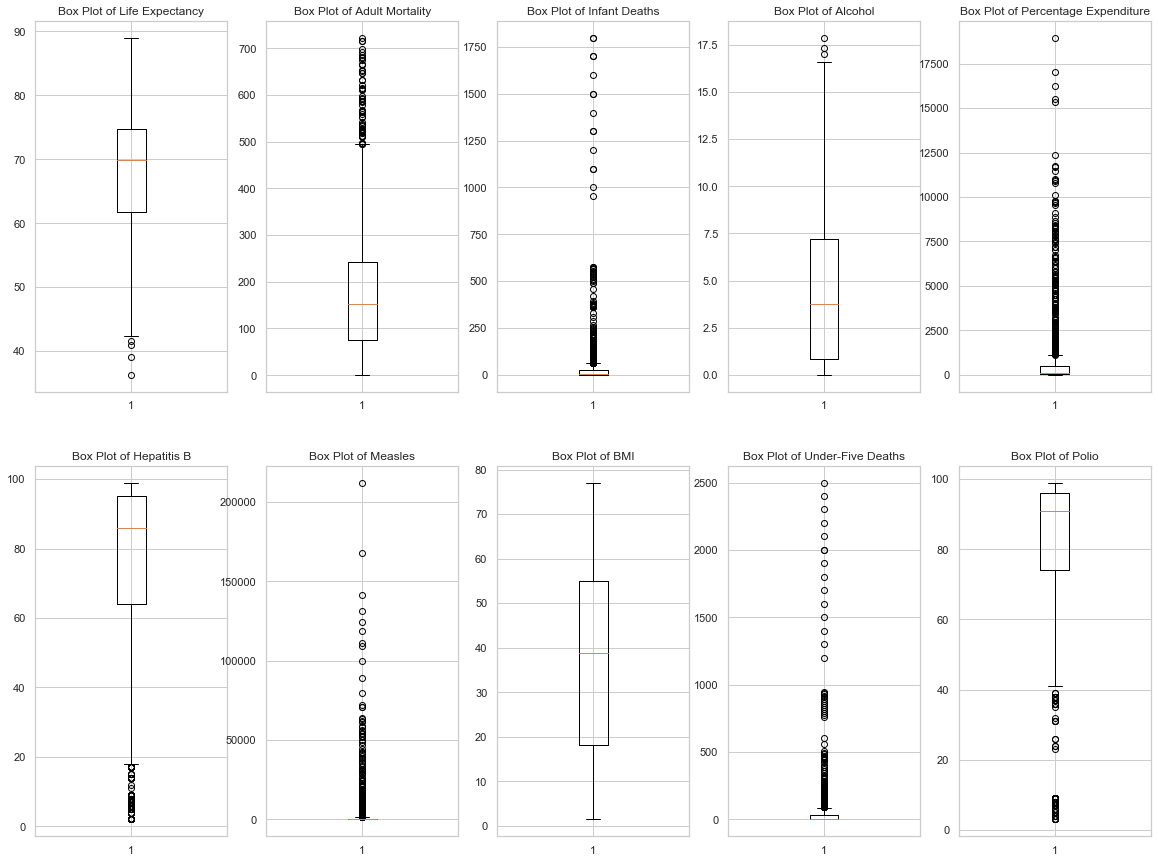

<IPython.core.display.Javascript object>

In [18]:
plt.figure(figsize=(20,15))
plt.subplot(2, 5, 1)
plt.boxplot(interpolated_life_df["Life expectancy "])
plt.title("Box Plot of Life Expectancy")

plt.subplot(2, 5, 2)
plt.boxplot(interpolated_life_df["Adult Mortality"])
plt.title("Box Plot of Adult Mortality")

plt.subplot(2, 5, 3)
plt.boxplot(interpolated_life_df["infant deaths"])
plt.title("Box Plot of Infant Deaths")

plt.subplot(2, 5, 4)
plt.boxplot(interpolated_life_df["Alcohol"])
plt.title("Box Plot of Alcohol")

plt.subplot(2, 5, 5)
plt.boxplot(interpolated_life_df["percentage expenditure"])
plt.title("Box Plot of Percentage Expenditure")

plt.subplot(2, 5, 6)
plt.boxplot(interpolated_life_df["Hepatitis B"])
plt.title("Box Plot of Hepatitis B")

plt.subplot(2, 5, 7)
plt.boxplot(interpolated_life_df["Measles "])
plt.title("Box Plot of Measles")

plt.subplot(2, 5, 8)
plt.boxplot(interpolated_life_df[" BMI "])
plt.title("Box Plot of BMI")

plt.subplot(2, 5, 9)
plt.boxplot(interpolated_life_df["under-five deaths "])
plt.title("Box Plot of Under-Five Deaths")

plt.subplot(2, 5, 10)
plt.boxplot(interpolated_life_df["Polio"])
plt.title("Box Plot of Polio")

plt.show()


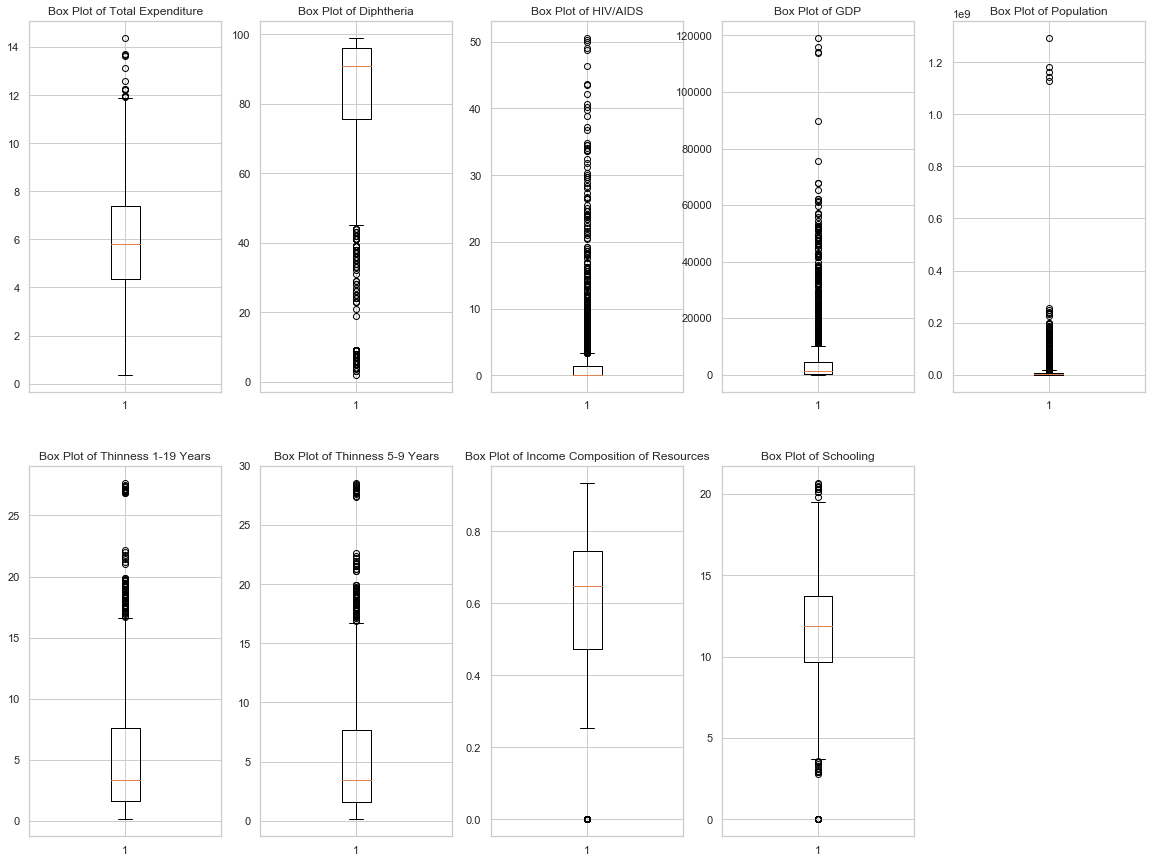

<IPython.core.display.Javascript object>

In [19]:
plt.figure(figsize=(20, 15))
plt.subplot(2, 5, 1)
plt.boxplot(interpolated_life_df["Total expenditure"])
plt.title("Box Plot of Total Expenditure")

plt.subplot(2, 5, 2)
plt.boxplot(interpolated_life_df["Diphtheria "])
plt.title("Box Plot of Diphtheria")

plt.subplot(2, 5, 3)
plt.boxplot(interpolated_life_df[" HIV/AIDS"])
plt.title("Box Plot of HIV/AIDS")

plt.subplot(2, 5, 4)
plt.boxplot(interpolated_life_df["GDP"])
plt.title("Box Plot of GDP")

plt.subplot(2, 5, 5)
plt.boxplot(interpolated_life_df["Population"])
plt.title("Box Plot of Population")

plt.subplot(2, 5, 6)
plt.boxplot(interpolated_life_df[" thinness  1-19 years"])
plt.title("Box Plot of Thinness 1-19 Years")

plt.subplot(2, 5, 7)
plt.boxplot(interpolated_life_df[" thinness 5-9 years"])
plt.title("Box Plot of Thinness 5-9 Years")

plt.subplot(2, 5, 8)
plt.boxplot(interpolated_life_df["Income composition of resources"])
plt.title("Box Plot of Income Composition of Resources")

plt.subplot(2, 5, 9)
plt.boxplot(interpolated_life_df["Schooling"])
plt.title("Box Plot of Schooling")

plt.show()

With the help of the boxplot visualizations above, I chose to compare the following columns to life expectancy since they appeared to have the most skewed data relative to the other box plots:

1) Infant Deaths

2) Percentage Expenditures

3) Measles

4) Under Five-Deaths

5) HIV/AIDS

6) GDP

7) Population


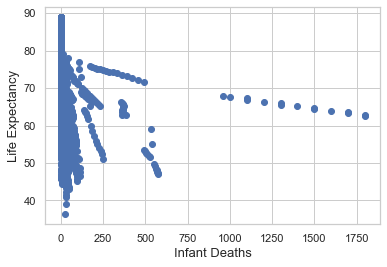

<IPython.core.display.Javascript object>

In [21]:
fig, ax = plt.subplots()
ax.scatter(
    x=interpolated_life_df["infant deaths"], y=interpolated_life_df["Life expectancy "],
)
plt.ylabel("Life Expectancy", fontsize=13)
plt.xlabel("Infant Deaths", fontsize=13)
plt.show()

In [22]:
# Data with values higher than 1,000 were considered as outlier values and dropped
interpolated_life_df = interpolated_life_df.drop(
    interpolated_life_df[(interpolated_life_df["infant deaths"] > 1000)].index
)

<IPython.core.display.Javascript object>

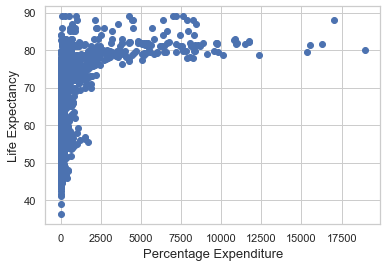

<IPython.core.display.Javascript object>

In [23]:
fig, ax = plt.subplots()
ax.scatter(
    x=interpolated_life_df["percentage expenditure"],
    y=interpolated_life_df["Life expectancy "],
)
plt.ylabel("Life Expectancy", fontsize=13)
plt.xlabel("Percentage Expenditure", fontsize=13)
plt.show()

In [24]:
# Data with values higher than 15,000 were considered as outlier values and dropped.
interpolated_life_df = interpolated_life_df.drop(
    interpolated_life_df[(interpolated_life_df["percentage expenditure"] > 15000)].index
)

<IPython.core.display.Javascript object>

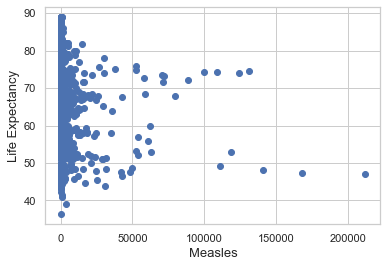

<IPython.core.display.Javascript object>

In [25]:
fig, ax = plt.subplots()
ax.scatter(
    x=interpolated_life_df["Measles "], y=interpolated_life_df["Life expectancy "],
)
plt.ylabel("Life Expectancy", fontsize=13)
plt.xlabel("Measles", fontsize=13)
plt.show()

In [26]:
# Data with values higher than 100,000 were considered as outlier values and dropped.
interpolated_life_df = interpolated_life_df.drop(
    interpolated_life_df[(interpolated_life_df["Measles "] > 100000)].index
)

<IPython.core.display.Javascript object>

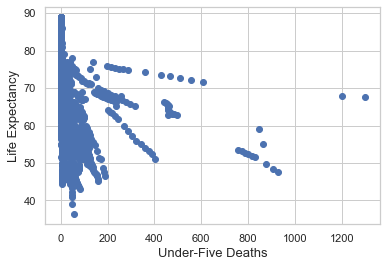

<IPython.core.display.Javascript object>

In [27]:
fig, ax = plt.subplots()
ax.scatter(
    x=interpolated_life_df["under-five deaths "],
    y=interpolated_life_df["Life expectancy "],
)
plt.ylabel("Life Expectancy", fontsize=13)
plt.xlabel("Under-Five Deaths", fontsize=13)
plt.show()

In [28]:
# Data with values higher than 900 were considered as outlier values and dropped.
interpolated_life_df = interpolated_life_df.drop(
    interpolated_life_df[(interpolated_life_df["under-five deaths "] > 900)].index
)

<IPython.core.display.Javascript object>

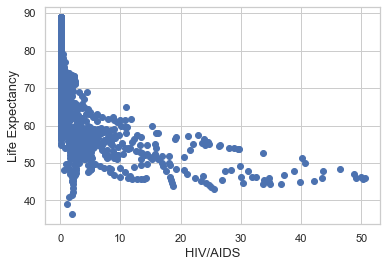

<IPython.core.display.Javascript object>

In [29]:
fig, ax = plt.subplots()
ax.scatter(
    x=interpolated_life_df[" HIV/AIDS"], y=interpolated_life_df["Life expectancy "],
)
plt.ylabel("Life Expectancy", fontsize=13)
plt.xlabel("HIV/AIDS", fontsize=13)
plt.show()

In [30]:
# After evaluating the scatter plot there does not appear to be outlier values for HIV/AIDS when compared to life expectancy.
# Therefore, no values will be dropped.

<IPython.core.display.Javascript object>

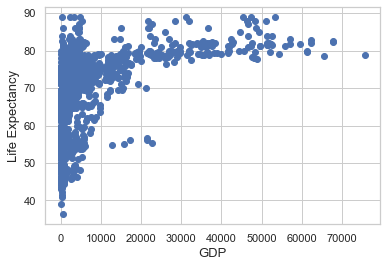

<IPython.core.display.Javascript object>

In [31]:
fig, ax = plt.subplots()
ax.scatter(
    x=interpolated_life_df["GDP"], y=interpolated_life_df["Life expectancy "],
)
plt.ylabel("Life Expectancy", fontsize=13)
plt.xlabel("GDP", fontsize=13)
plt.show()

In [32]:
# Data with values higher than 60,000 were considered as outlier values and dropped.
interpolated_life_df = interpolated_life_df.drop(
    interpolated_life_df[(interpolated_life_df["GDP"] > 60000)].index
)

<IPython.core.display.Javascript object>

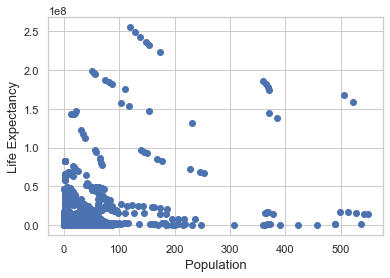

<IPython.core.display.Javascript object>

In [33]:
fig, ax = plt.subplots()
ax.scatter(
    x=interpolated_life_df["infant deaths"], y=interpolated_life_df["Population"],
)
plt.ylabel("Life Expectancy", fontsize=13)
plt.xlabel("Population", fontsize=13)
plt.show()

In [34]:
# After evaluating the scatter plot there does not appear to be outlier values for population when compared to life expectancy.
# Therefore, no values will be dropped.

<IPython.core.display.Javascript object>

As part of the exploratory data analysis, I wanted to obtain the descriptive statistics for our new data.

We see the average life expectancy is around 68 years old and the maximum life expectancy is 89 years old while the minimum life expectancy is 36 years old give or take around 10 years.


In [57]:
interpolated_life_df.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  1949.000000       1949.000000      1949.000000    1949.000000   
mean   2006.980503         67.973884       176.563366      24.363776   
std       4.324448          9.661484       131.882655      60.486117   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2003.000000         61.600000        77.000000       1.000000   
50%    2007.000000         69.900000       154.000000       3.000000   
75%    2011.000000         74.700000       247.000000      24.000000   
max    2015.000000         89.000000       723.000000     549.000000   

           Alcohol  percentage expenditure  Hepatitis B      Measles   \
count  1949.000000             1949.000000  1949.000000   1949.000000   
mean      4.415652              610.948078    74.302719   1837.012314   
std       3.955519             1437.594177    28.666168   7156.633599   
min       0.010000                0.000000     2.000000      0.000000   
25%       0.760000               29.743430    64.000000      0.000000   
50%       3.760000              105.633726    86.000000     19.000000   
75%       7.100000              469.390419    95.000000    443.000000   
max      17.870000            11477.667100    99.000000  99602.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  1949.000000         1949.000000  1949.000000        1949.000000   
mean     36.576347           34.216521    80.484864           5.911195   
std      19.691612           85.148073    24.374841           2.290331   
min       1.400000            0.000000     3.000000           0.370000   
25%      18.300000            1.000000    75.000000           4.380000   
50%      39.300000            4.000000    91.000000           5.810000   
75%      55.000000           33.000000    96.000000           7.390000   
max      77.100000          879.000000    99.000000          14.390000   

       Diphtheria      HIV/AIDS           GDP    Population  \
count  1949.000000  1949.000000   1949.000000  1.949000e+03   
mean     80.597229     2.293279   4933.567745  1.007699e+07   
std      24.398543     6.049791   9504.101329  2.644105e+07   
min       2.000000     0.100000      1.681350  3.400000e+01   
25%      76.000000     0.100000    379.756639  1.918970e+05   
50%      91.000000     0.100000   1326.973390  1.373513e+06   
75%      96.000000     1.400000   4429.657500  7.423289e+06   
max      99.000000    50.600000  59593.287110  2.551311e+08   

        thinness  1-19 years   thinness 5-9 years  \
count            1949.000000          1949.000000   
mean                4.963571             5.028733   
std                 4.346932             4.420107   
min                 0.100000             0.100000   
25%                 1.600000             1.700000   
50%                 3.300000             3.400000   
75%                 7.500000             7.600000   
max                22.200000            22.600000   

       Income composition of resources    Schooling  
count                      1949.000000  1949.000000  
mean                          0.603319    11.633607  
std                           0.204578     3.201297  
min                           0.000000     0.000000  
25%                           0.470000     9.800000  
50%                           0.649000    11.900000  
75%                           0.744000    13.700000  
max                           0.927000    20.700000

<IPython.core.display.Javascript object>

In [37]:
interpolated_life_df.corr().loc[["Life expectancy "], :].head()

Year  Life expectancy   Adult Mortality  infant deaths  \
Life expectancy   0.161845               1.0        -0.671725      -0.265568   

                   Alcohol  percentage expenditure  Hepatitis B  Measles   \
Life expectancy   0.394508                0.434925     0.237593 -0.123254   

                      BMI   under-five deaths      Polio  Total expenditure  \
Life expectancy   0.599418           -0.306096  0.405241           0.185845   

                  Diphtheria    HIV/AIDS       GDP  Population  \
Life expectancy      0.433796  -0.578406  0.468079    0.027947   

                   thinness  1-19 years   thinness 5-9 years  \
Life expectancy               -0.480111             -0.47179   

                  Income composition of resources  Schooling  
Life expectancy                          0.720111   0.742917

<IPython.core.display.Javascript object>

According to the heatmap we see that there are higher negative correlations between life expectancy and Adult mortality and  life expectancy and HIV/AIDS. There are also slight negative correlations between life expectancy and thinness 1-19 years and thinness 5-9 years. 

There are high positive correlations between life expectancy and BMI, Income composition of resources, and Schooling. There is also a slight positive correlation between life expectancy and percentage expenditure, Polio, Diphtheria, and GDP.

Text(0.5, 1, 'Heat Map of Correlation')

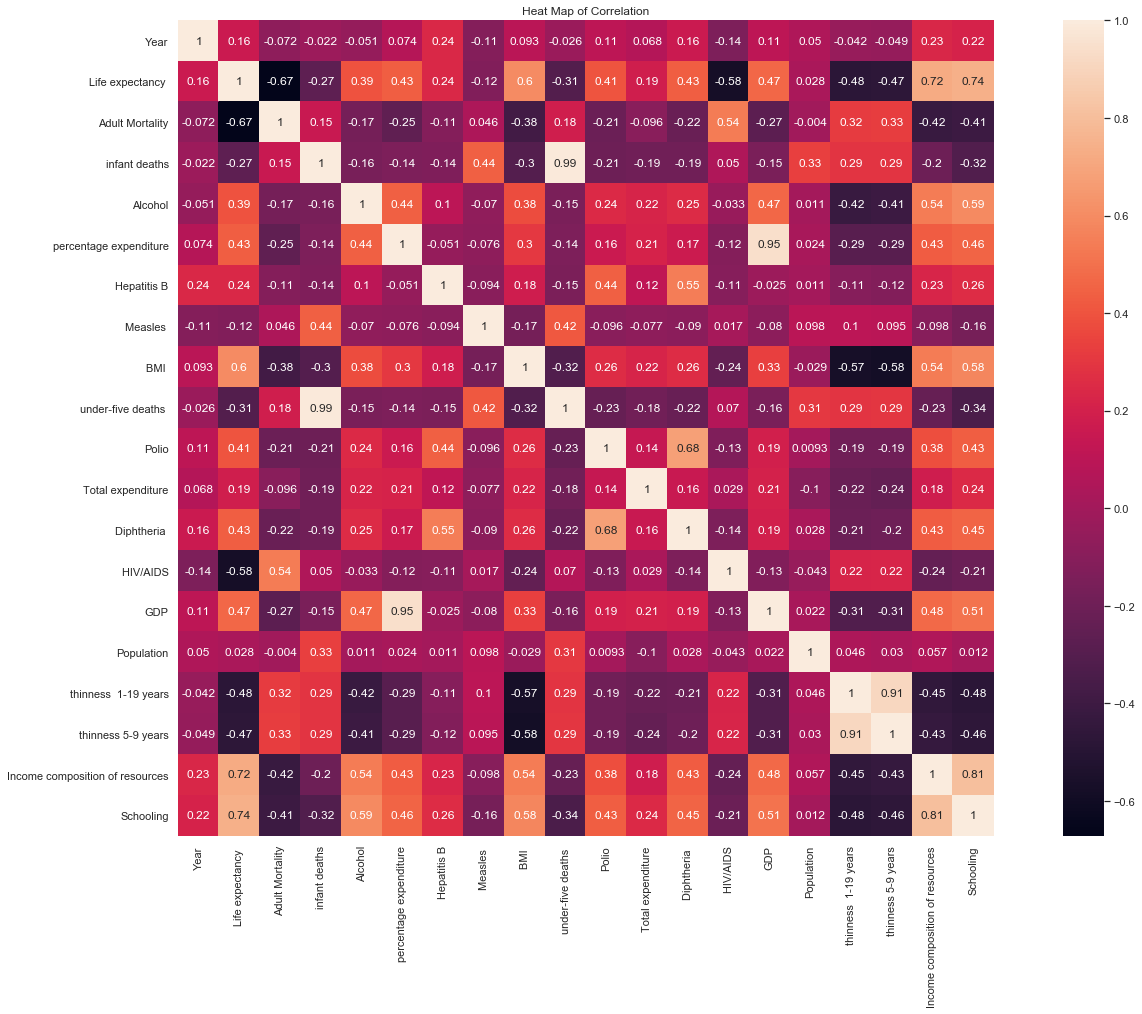

<IPython.core.display.Javascript object>

In [38]:
life_corr = interpolated_life_df.corr()
plt.figure(figsize=(25, 15))
sns.heatmap(life_corr, square=True, annot=True)
plt.title("Heat Map of Correlation")

Using the heatmap, I chose the following variables to conduct statistical tests on:

1) Adult mortality 

2) HIV/AIDS

3) BMI

4) Income composition of resources

5) Schooling

6) thinness 1-19 years and thinness 5-9 years

7) percentage expenditure

8) GDP

In [39]:
_, p = ttest_ind(
    interpolated_life_df["Life expectancy "], interpolated_life_df["Adult Mortality"]
)
if p < 0.05:
    print("The higher the value for adult mortality the lower the life expectancy")
else:
    print("There is no significant relationship")

_, p = ttest_ind(
    interpolated_life_df["Life expectancy "], interpolated_life_df[" HIV/AIDS"]
)
if p < 0.05:
    print("The higher the value for HIV/AIDS the lower the life expectancy")
else:
    print("There is no significant relationship")

_, p = ttest_ind(
    interpolated_life_df["Life expectancy "], interpolated_life_df[" BMI "]
)
if p < 0.05:
    print("The higher the value for BMI the higher the life expectancy")
else:
    print("There is no significant relationship")

_, p = ttest_ind(
    interpolated_life_df["Life expectancy "],
    interpolated_life_df["Income composition of resources"],
)
if p < 0.05:
    print(
        "The higher the value for income composition of resources the higher the life expectancy"
    )
else:
    print("There is no significant relationship")

_, p = ttest_ind(
    interpolated_life_df["Life expectancy "], interpolated_life_df["Schooling"],
)
if p < 0.05:
    print("The higher the value for schooling the higher the life expectancy")
else:
    print("There is no significant relationship")

_, p = ttest_ind(
    interpolated_life_df["Life expectancy "],
    interpolated_life_df[" thinness  1-19 years"],
)
if p < 0.05:
    print("The higher the value for thinness 1-19 years the lower the life expectancy")
else:
    print("There is no significant relationship")

_, p = ttest_ind(
    interpolated_life_df["Life expectancy "],
    interpolated_life_df[" thinness 5-9 years"],
)
if p < 0.05:
    print("The higher the value for thinness 5-9 years the lower the life expectancy")
else:
    print("There is no significant relationship")

_, p = ttest_ind(
    interpolated_life_df["Life expectancy "],
    interpolated_life_df["percentage expenditure"],
)
if p < 0.05:
    print(
        "The higher the value for percentage expenditure the higher the life expectancy"
    )
else:
    print("There is no significant relationship")

_, p = ttest_ind(interpolated_life_df["Life expectancy "], interpolated_life_df["GDP"],)
if p < 0.05:
    print("The higher the value for GDP the higher the life expectancy")
else:
    print("There is no significant relationship")

The higher the value for adult mortality the lower the life expectancy
The higher the value for HIV/AIDS the lower the life expectancy
The higher the value for BMI the higher the life expectancy
The higher the value for income composition of resources the higher the life expectancy
The higher the value for schooling the higher the life expectancy
The higher the value for thinness 1-19 years the lower the life expectancy
The higher the value for thinness 5-9 years the lower the life expectancy
The higher the value for percentage expenditure the higher the life expectancy
The higher the value for GDP the higher the life expectancy


<IPython.core.display.Javascript object>

In [60]:
# This cell is used to scale the variances
X = interpolated_life_df.drop(columns=["Country", "Year", "Status", "Life expectancy "])
y = interpolated_life_df["Life expectancy "]
scaler = StandardScaler()
scaler.fit(X)
scaled_X = scaler.transform(X)
scaled_df = pd.DataFrame(scaled_X, columns=X.columns)

print("\n\nFeature variances before scaling:")
print(scaled_df.var().sort_values(ascending=False).head())



Feature variances before scaling:
Diphtheria               1.000513
Measles                  1.000513
infant deaths            1.000513
 thinness  1-19 years    1.000513
Alcohol                  1.000513
dtype: float64


<IPython.core.display.Javascript object>

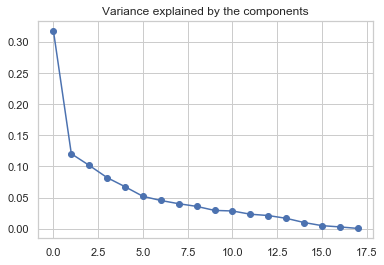

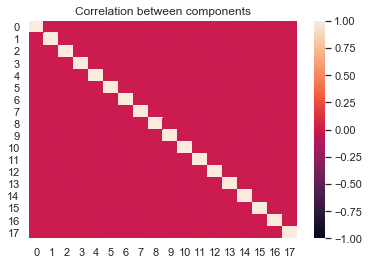

<IPython.core.display.Javascript object>

In [61]:
# This cell is used to show the variances by each component, we see that after 1 variance it is not as effective.
pca = PCA()
pca.fit(scaled_X)
pca_X = pca.transform(scaled_X)
plt.plot(pca.explained_variance_ratio_, marker="o")
plt.title("Variance explained by the components")
plt.show()

sns.heatmap(pd.DataFrame(pca_X).corr(), vmin=-1, vmax=1)
plt.title("Correlation between components")
plt.show()

In [55]:
# Using the data from above I am choosing to use 5 component for this model
pca = PCA(n_components=5)
pca.fit(scaled_X)
pca_X = pca.transform(scaled_X)

<IPython.core.display.Javascript object>

In [56]:
# Using this model will give us around a 79% accuracy when trying to determine Life expectancy.
model = LinearRegression()
model.fit(pca_X, y)
model.score(pca_X, y)

0.792356630052589

<IPython.core.display.Javascript object>

In conclusion, this model will be able to predict the life expectancy with around an 79% accuracy. To my surprise, the population variable had little to no correlation with life expectancy. Where as the life expectancy is positively correlated to income composition of resources and schooling, and negatively correlated to adult mortality and HIV/AIDS. To my surprise, the population variable had little to no correlation with life expectancy. Additionally, it appears that using 5 components for the Principles Component Analysis seems most effective because 4 components give around a 71% accuracy and 6 components is still 79% accuracy